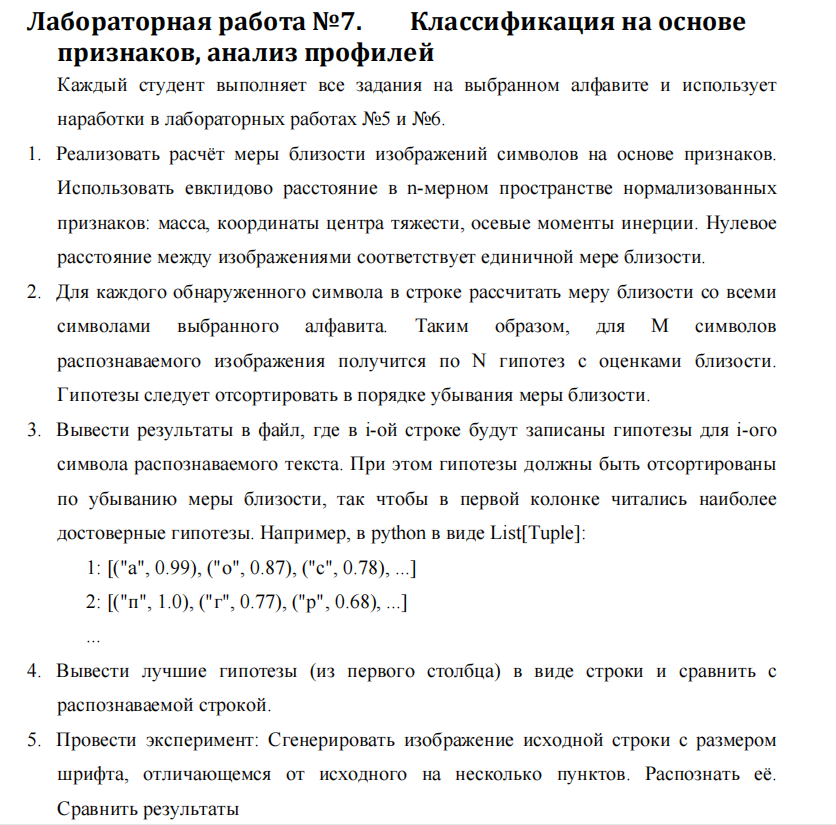

Вариант 21

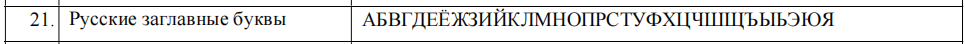

In [1]:
from PIL import Image, ImageFont, ImageDraw, ImageOps
import numpy as np
from matplotlib import pyplot as plt
import csv

In [2]:
string = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'.upper()
alphabet = []
for letter in string:
    alphabet.append(letter)

In [3]:
def simple_binarization(image, threshold):
    img_arr = np.array(image)
    new_image = np.zeros(shape=img_arr.shape)
    new_image[img_arr > threshold] = 255
    return Image.fromarray(new_image.astype(np.uint8), 'L')

In [4]:
def cut_white_image_parts(image):

    for x in range(image.width-1, -1, -1):
        is_col_empty = True
        for y in range(image.height):
            if image.getpixel((x, y)) < 255:
                is_col_empty = False
                break

        if not is_col_empty:
            right_pixel = x
            break
            
    for y in range(image.height-1, -1, -1):
        is_row_empty = True
        for x in range(image.width):
            if image.getpixel((x, y)) < 255:
                is_row_empty = False
                break

        if not is_row_empty:
            bottom_pixel = y
            break
    
    for x in range(0, image.width):
        is_col_empty = True
        for y in range(image.height):
            if image.getpixel((x, y)) < 255:
                is_col_empty = False
                break

        if not is_col_empty:
            left_pixel = x
            break
            
    for y in range(0, image.height):
        is_row_empty = True
        for x in range(image.width):
            if image.getpixel((x, y)) < 255:
                is_row_empty = False
                break

        if not is_row_empty:
            upper_pixel = y
            break
            

    return image.crop(box=(left_pixel, upper_pixel, right_pixel, bottom_pixel))

In [5]:
def color_used_arr(img):
    return np.asarray(np.asarray(img) < 1, dtype = np.int0)

In [6]:
def get_features(img):
    img_arr_for_calculations = color_used_arr(img)

    weight = img_arr_for_calculations.sum()

    S = img_arr_for_calculations.shape[0] * img_arr_for_calculations.shape[1]
    rel_weight = round(weight / S, 5)

    x_avg = 0
    for x, column in enumerate(img_arr_for_calculations.T):
        x_avg += sum((x + 1) * column)
    x_avg = round(x_avg/weight, 5)
    rel_x_avg = round((x_avg-1)/(img_arr_for_calculations.shape[1]-1), 5)

    y_avg = 0
    for y, row in enumerate(img_arr_for_calculations):
        y_avg += sum((y + 1) * row)
    y_avg = round(y_avg/weight, 5)
    rel_y_avg = round((y_avg-1)/(img_arr_for_calculations.shape[0]-1), 5)

    iner_x = 0
    for y, row in enumerate(img_arr_for_calculations):
        iner_x += sum((y + 1 - y_avg)**2 * row)
    iner_x = round(iner_x, 5)
    rel_iner_x = round(iner_x/(img_arr_for_calculations.shape[0]**2 + img_arr_for_calculations.shape[1]**2), 5)

    iner_y = 0
    for x, column in enumerate(img_arr_for_calculations.T):
        iner_y += sum((x + 1 - x_avg)**2 * column)
    iner_y = round(iner_y, 5)
    rel_iner_y = round(iner_y/(img_arr_for_calculations.shape[0]**2 + img_arr_for_calculations.shape[1]**2), 5)

    return {
        'rel_weight': rel_weight,
        'rel_center': (rel_x_avg, rel_y_avg),
        'rel_inertia': (rel_iner_x, rel_iner_y)
    }

In [7]:
def get_segments_list(img):
    img_arr_for_calculations = color_used_arr(img)
    x_profiles = np.sum(img_arr_for_calculations, axis=0)
    lst = []
    new_lst = []
    for i in range(len(x_profiles)):
        if x_profiles[i] == 0:
            lst.append(i)
    lst.append(img.width)

    
    for i in range(len(lst)-1):
        if lst[i] + 1 != lst[i+1]:
            new_lst.append(lst[i])
            new_lst.append(lst[i+1])
    new_lst.append(img.width-1)
    new_lst = sorted(list(set(new_lst)))
    
    
    segments = []
    for i in range(0, len(new_lst)-1, 2):
        segments.append((new_lst[i], new_lst[i+1]))
    return segments

In [61]:
def result_draw(image, segments):
    left_color = (124,252,0)
    right_color = (160,32,240)
    result = image.copy().convert('RGB')
    result_draw = ImageDraw.Draw(im=result)
    for segment in segments:
        result_draw.rectangle(xy=[(segment[0], 0), (segment[0], result.height)], fill=left_color)
        result_draw.rectangle(xy=[(segment[1], 0), (segment[1], result.height)], fill=right_color)
    return result

In [9]:
img = Image.open('font_52_test.png')

In [38]:
img_100 = Image.open('font_100_test.png')

In [75]:
def get_letter_images(image):
    letter_images_list = []
    
    segments = get_segments_list(image)
    
    for segment in segments:
        letter_image = image.crop(box=(segment[0]+1, 0, segment[1], image.height))
        cutted_letter_image = cut_white_image_parts(letter_image)
        
        letter_images_list.append(cutted_letter_image)
    return letter_images_list

In [76]:
letter_images_list = get_letter_images(img)

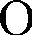

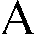

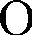

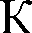

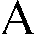

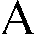

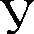

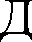

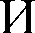

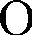

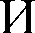

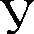

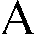

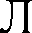

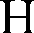

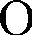

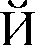

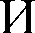

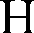

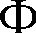

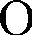

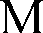

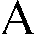

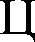

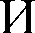

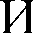

In [77]:
for el in letter_images_list:
    display(el)

1. Загрузить и разрезать изображение на буквы  
2. Передать в подсчет нормированных весов
3. Сделать функцию возвращающую подсчет эталонов
4. Написать сравнение 

## 